In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np


In [2]:
data = pd.read_csv("wine.csv")

In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data.shape

(178, 14)

In [6]:
data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [44]:
correlation=data.corr()
correlation.style.background_gradient(cmap='coolwarm')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Type,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoids,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


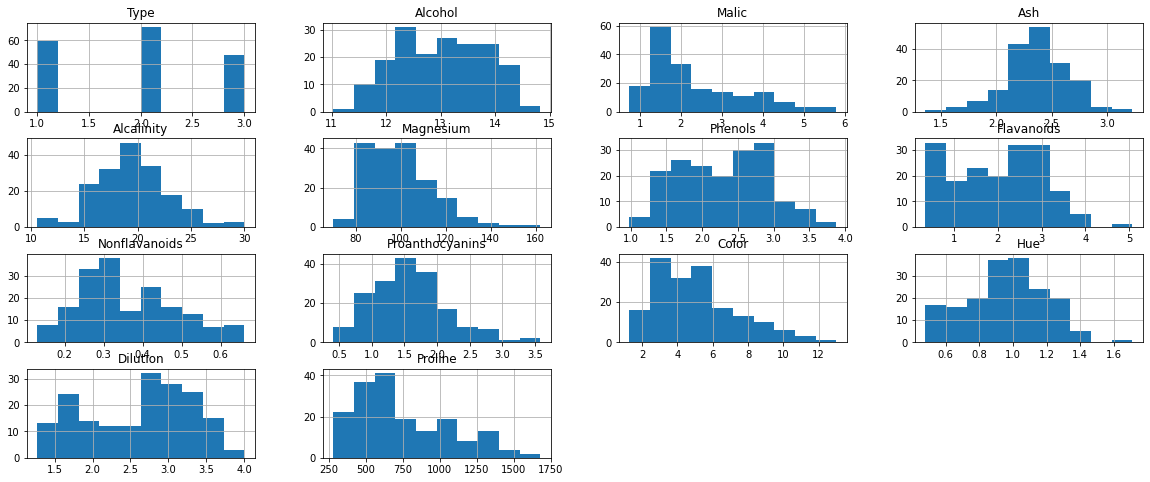

In [8]:
from matplotlib import pyplot
data.hist(figsize=(20,8))
pyplot.show()

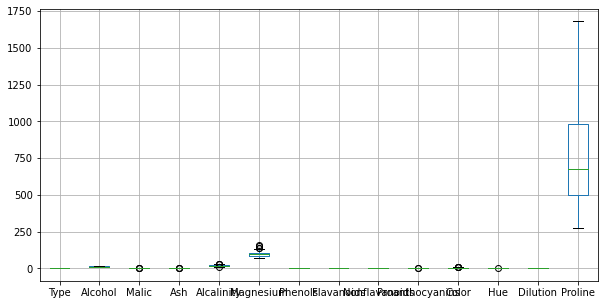

In [9]:
data.boxplot(figsize=(10,5))

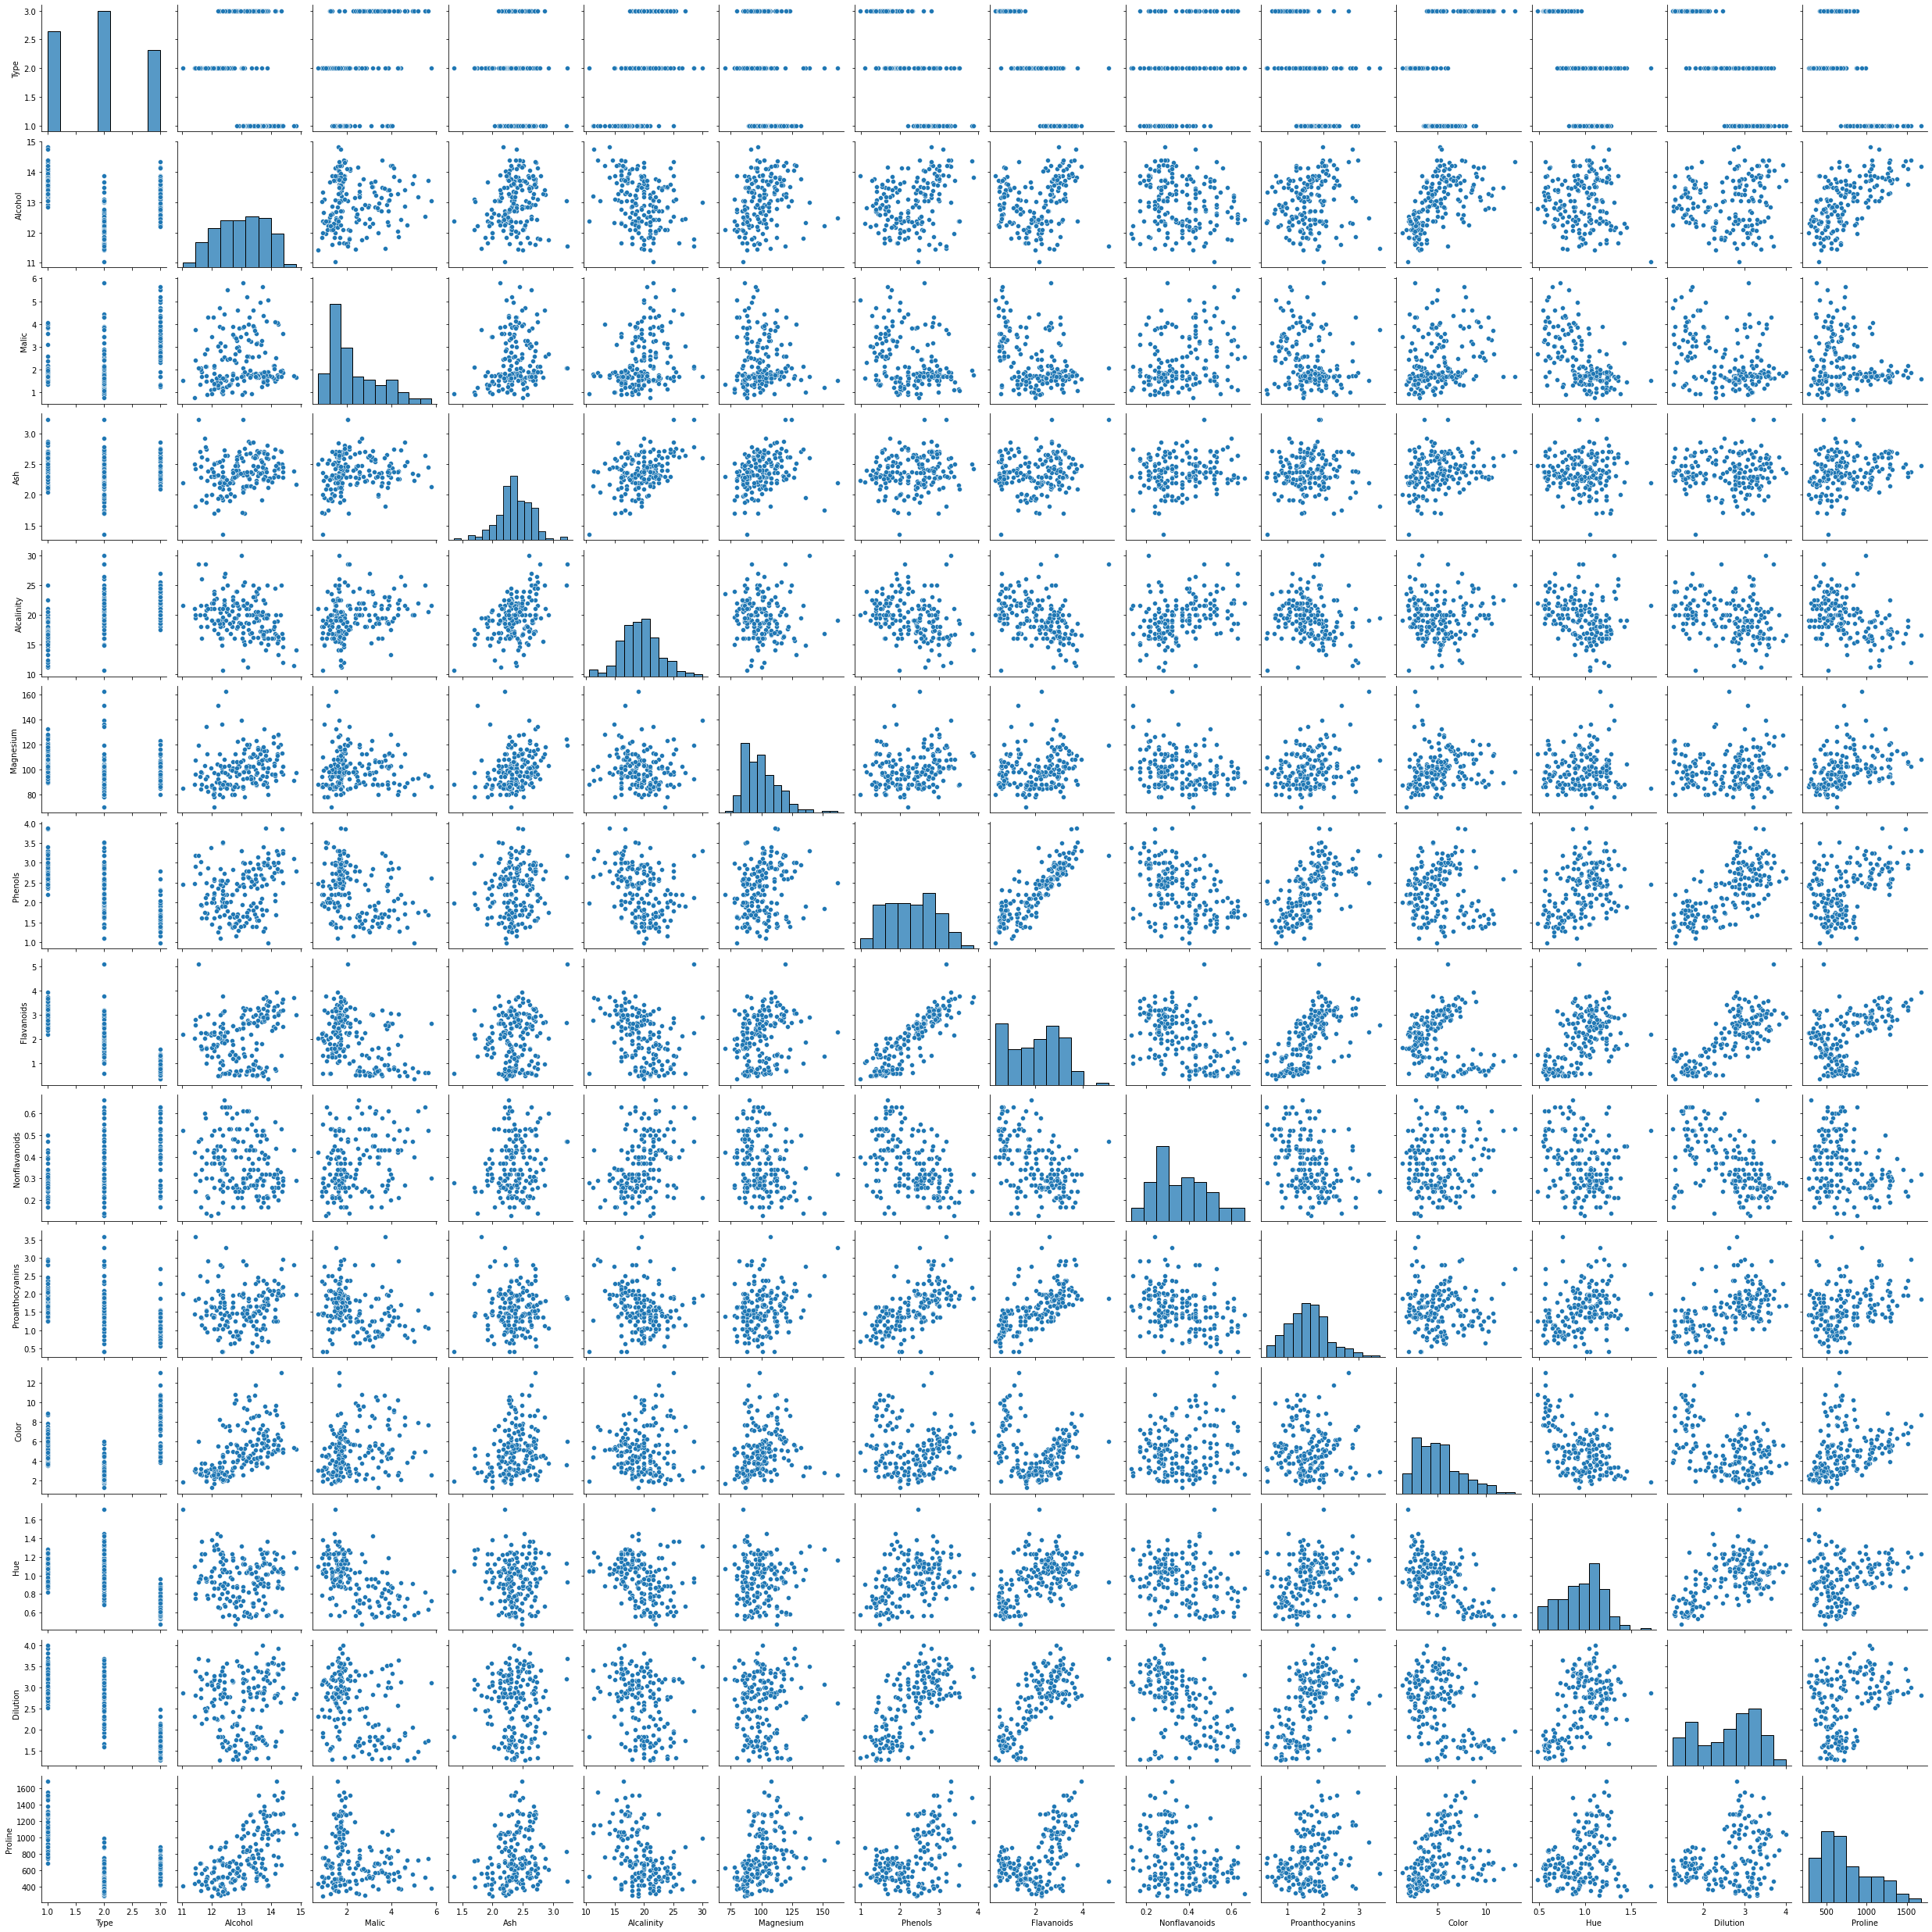

In [10]:
sns.pairplot(data)

In [11]:
data1 = data.drop(columns=['Type'],axis=1)

In [12]:
data1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [13]:
scaler = StandardScaler()
data_scl = scaler.fit_transform(data)
data_scl 

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [14]:
pca = PCA()
pca_val = pca.fit_transform(data_scl)
pca_val

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01, ...,
         5.52927766e-01, -3.02978176e-01,  2.00857450e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00, ...,
         3.94971160e-01, -1.46645308e-01,  1.26402355e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01, ...,
         1.89799314e-03,  2.12780166e-02, -5.57515155e-02],
       ...,
       [ 3.02727243e+00, -2.75604024e+00, -9.40803036e-01, ...,
         6.93336340e-01,  1.67035660e-01, -3.16957430e-02],
       [ 2.75522166e+00, -2.29378408e+00, -5.50473677e-01, ...,
         3.44119826e-01, -1.09514873e-01,  1.02823104e-01],
       [ 3.49633565e+00, -2.76060799e+00,  1.01315115e+00, ...,
        -1.89866131e-01, -1.64090011e-01, -2.64916504e-01]])

# The amount of variance that each PCA explains is

In [15]:
val = pca.explained_variance_ratio_
val

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

# Cumulative variance 

In [16]:
var1 = np.cumsum(np.round(val,decimals=4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

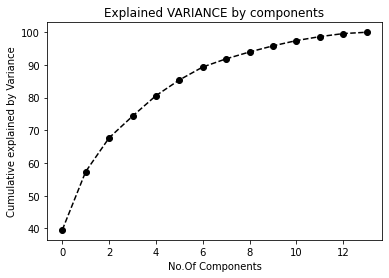

In [17]:
plt.title('Explained VARIANCE by components')
plt.xlabel('No.Of Components')
plt.ylabel('Cumulative explained by Variance')
plt.plot(var1,marker='o',linestyle='--',color="black")

As a data scientist, your requirement is that 80% of the variance must be explained in the PCA transformed data. This level of cumulative variance is explained by including 5 principal components. 

In [18]:
pca.components_

array([[ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
        -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
         0.08931829, -0.27682265, -0.35052618, -0.26951525],
       [-0.00569041, -0.48416087, -0.22359095, -0.31585588,  0.01161574,
        -0.30055143, -0.06711983,  0.00131345, -0.0269887 , -0.04122256,
        -0.52978274,  0.27790735,  0.16277625, -0.36605886],
       [ 0.00121795, -0.20740081,  0.08879606,  0.62610236,  0.6119896 ,
         0.13098458,  0.14650775,  0.15096275,  0.16997551,  0.14987959,
        -0.1372663 ,  0.08532854,  0.16620436, -0.12668685],
       [ 0.12246373, -0.08191848,  0.46988824, -0.24984122,  0.07199322,
        -0.16321412,  0.19098521,  0.14461667, -0.32801272,  0.46275771,
         0.07211248, -0.43466618,  0.15672341, -0.2557949 ],
       [ 0.15758395, -0.25089415, -0.18860015, -0.0935236 ,  0.0465675 ,
         0.77833048, -0.14466563, -0.11200553, -0.43257916,  0.0915882 ,
        -0.0462696 , -0.02

In [19]:
Pca_final = PCA(n_components=5,random_state=42)
pca_val = Pca_final.fit_transform(data_scl)
pca_val

array([[-3.52293390e+00, -1.45309844e+00, -1.64795488e-01,
        -1.32728225e-02,  7.37345361e-01],
       [-2.52885806e+00,  3.30019252e-01, -2.02670665e+00,
        -4.17144363e-01, -2.83213734e-01],
       [-2.78502898e+00, -1.03693595e+00,  9.83237703e-01,
         6.64232412e-01, -3.87564967e-01],
       [-3.92258841e+00, -2.76821026e+00, -1.74968168e-01,
         5.65087823e-01, -3.24359712e-01],
       [-1.40751111e+00, -8.67773087e-01,  2.02582949e+00,
        -4.40905804e-01,  2.27949246e-01],
       [-3.28812981e+00, -2.13017513e+00, -6.28992339e-01,
        -6.05371900e-01, -4.09626431e-01],
       [-2.75057754e+00, -1.17916999e+00, -9.77337471e-01,
        -3.53588487e-01, -1.02427680e+00],
       [-2.39286652e+00, -1.61128232e+00,  1.45729462e-01,
        -1.24560173e+00,  2.07437858e-01],
       [-2.79525633e+00, -9.23179517e-01, -1.77092548e+00,
        -1.56826533e-01, -8.58464843e-01],
       [-3.00559666e+00, -7.96284169e-01, -9.83741629e-01,
         2.70293146e-01

In [20]:
df_PCA = pd.DataFrame(data = pca_val, columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_PCA['Type'] = data['Type']
df_PCA.head(20)


,PC1,PC2,PC3,PC4,PC5,Type
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,1
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,1
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,1
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,1
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,1
5,-3.288130,-2.130175,-0.628992,-0.605372,-0.409626,1
6,-2.750578,-1.179170,-0.977337,-0.353588,-1.024277,1
7,-2.392867,-1.611282,0.145729,-1.245602,0.207438,1
8,-2.795256,-0.923180,-1.770925,-0.156827,-0.858465,1
9,-3.005597,-0.796284,-0.983742,0.270293,-0.471845,1


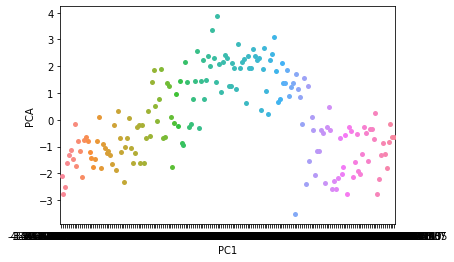

In [21]:
#Grouping with stripplot()
sns.stripplot(x='PC1', y='PC2', data=df_PCA)
plt.ylabel('PCA')
plt.show()

**KMEAN**

In [22]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(pca_val)
    wcss.append(kmeans.inertia_)

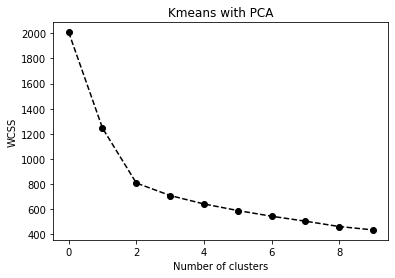

In [23]:
plt.plot(wcss,marker='o',linestyle='--',color="black")
plt.title('Kmeans with PCA')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
kmean1=KMeans(n_clusters=3,random_state=42)
kmean1.fit(pca_val)
kmean1.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [25]:
df_PCA['cluster_id1']=kmean1.labels_

In [26]:
df_PCA.groupby(['cluster_id1']).count()

,PC1,PC2,PC3,PC4,PC5,Type
cluster_id1,,,,,,
0,67,67,67,67,67,67
1,49,49,49,49,49,49
2,62,62,62,62,62,62


Text(0.5, 1.0, 'Clusters using KMeans')

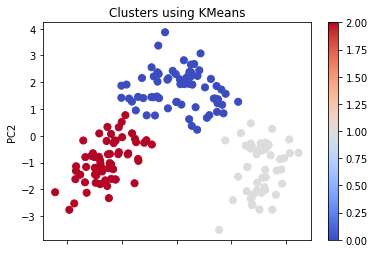

In [27]:
df_PCA.plot(x="PC1",y ="PC2",c=kmean1.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

hierarchy clustering

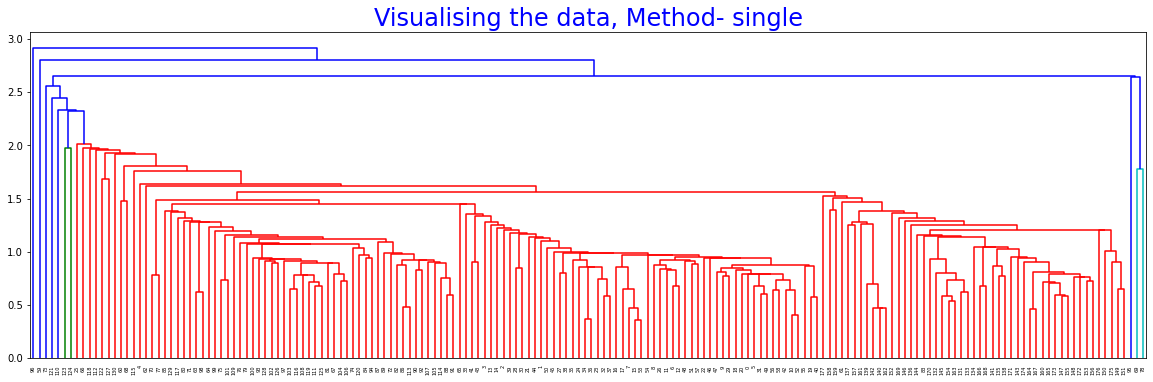

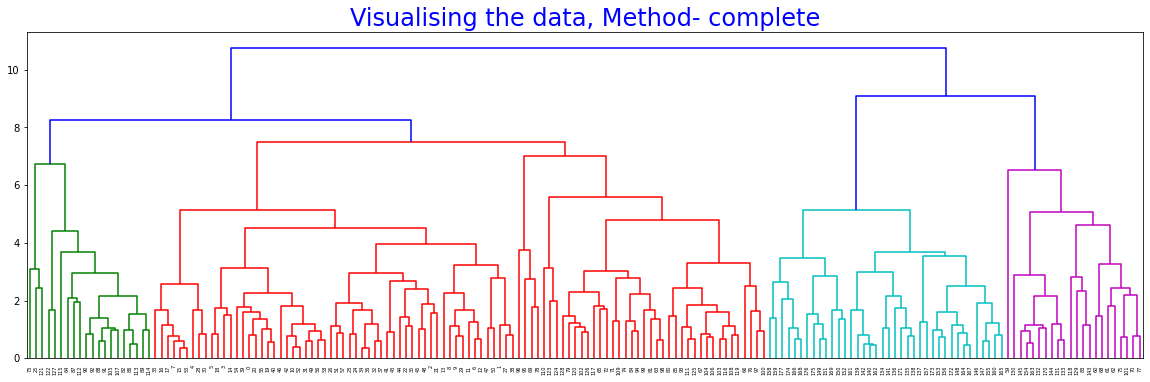

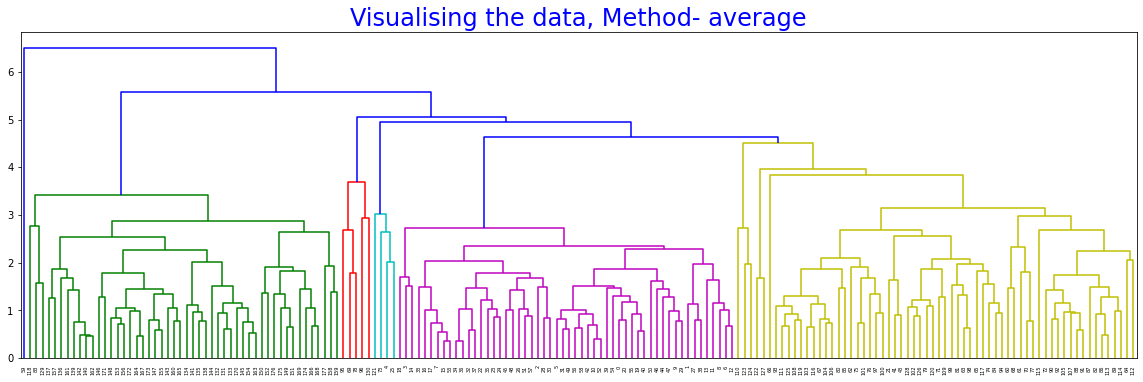

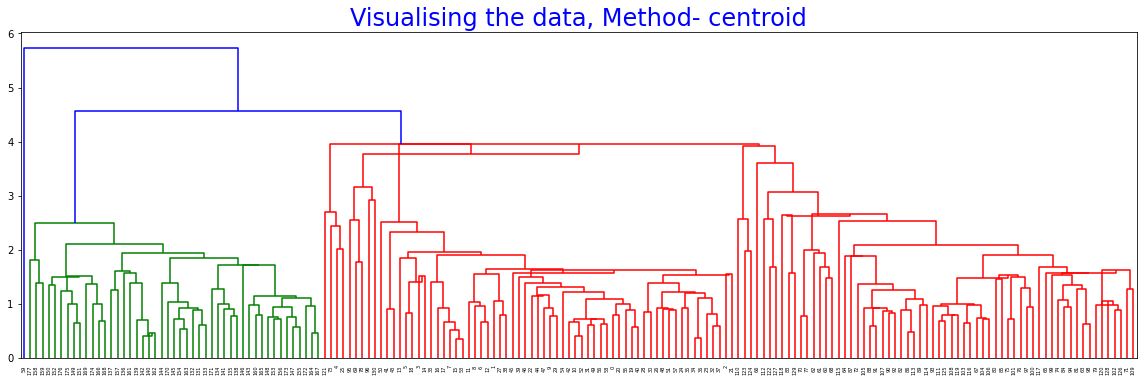

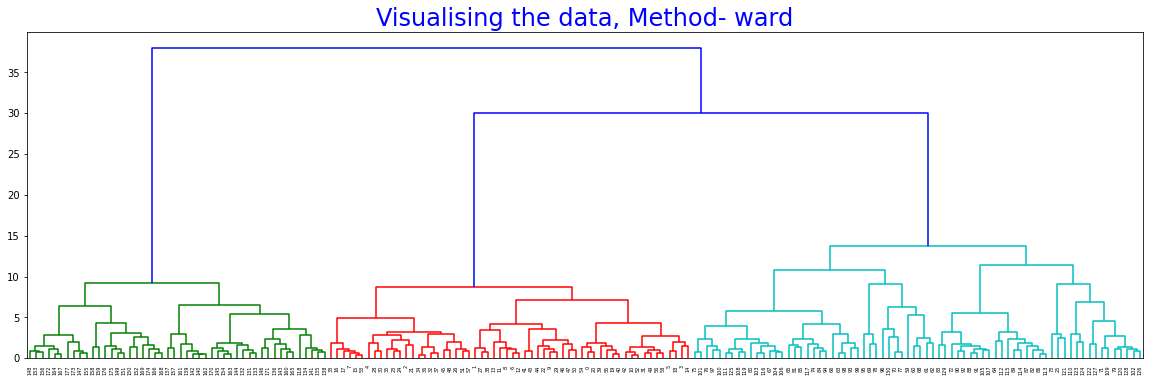

In [28]:
import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','centroid','ward']: 
   plt.figure(figsize =(20, 6)) 
   dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
   plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
   Dendrogram1 = shc.dendrogram(shc.linkage(pca_val, method = methods,optimal_ordering=False))

In [35]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

after runnin g all method ward method gives best cluster so i slected ward method.

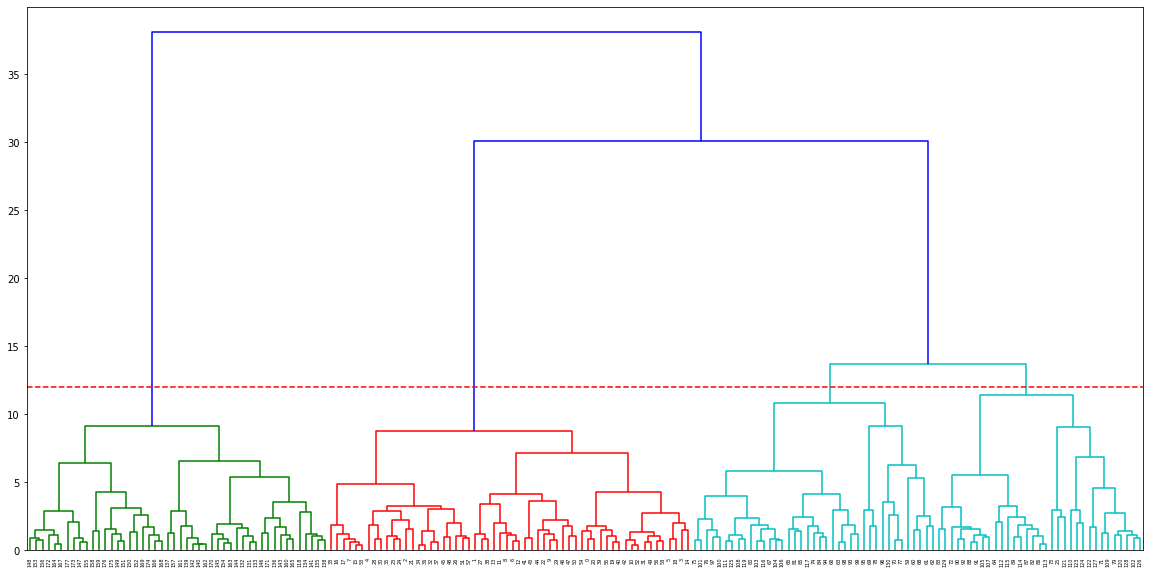

In [36]:
plt.figure(figsize=(20, 10))
Dendrogram=sch.dendrogram(sch.linkage(pca_val,method='ward'))
plt.axhline(y=12, color='r', linestyle='--')
plt.show()

In [37]:
from sklearn.cluster import AgglomerativeClustering 
h_complete = AgglomerativeClustering(n_clusters=4, linkage='ward',affinity = "euclidean").fit(data) 
y_hc = h_complete.fit_predict(pca_val)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,2
1,2
2,2
3,2
4,2
...,...
173,3
174,3
175,3
176,3


In [38]:
df_PCA['cluster_id'] = Clusters

In [39]:
df_PCA

,PC1,PC2,PC3,PC4,PC5,Type,cluster_id1,cluster_id
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,1,2,2
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,1,2,2
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,1,2,2
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,1,2,2
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,1,2,2
...,...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,3,1,3
174,2.942729,-1.752263,0.207480,0.399381,0.154223,3,1,3
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,3,1,3
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,3,1,3


In [40]:
df_PCA1 = df_PCA.drop(columns=['cluster_id1'],axis=1)

In [41]:
df_PCA1

,PC1,PC2,PC3,PC4,PC5,Type,cluster_id
0,-3.522934,-1.453098,-0.164795,-0.013273,0.737345,1,2
1,-2.528858,0.330019,-2.026707,-0.417144,-0.283214,1,2
2,-2.785029,-1.036936,0.983238,0.664232,-0.387565,1,2
3,-3.922588,-2.768210,-0.174968,0.565088,-0.324360,1,2
4,-1.407511,-0.867773,2.025829,-0.440906,0.227949,1,2
...,...,...,...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705,-1.004109,3,3
174,2.942729,-1.752263,0.207480,0.399381,0.154223,3,3
175,3.027272,-2.756040,-0.940803,0.607758,1.128136,3,3
176,2.755222,-2.293784,-0.550474,-0.391570,1.067083,3,3


In [42]:
df_PCA1.groupby(['cluster_id']).count()

,PC1,PC2,PC3,PC4,PC5,Type
cluster_id,,,,,,
0,33,33,33,33,33,33
1,39,39,39,39,39,39
2,58,58,58,58,58,58
3,48,48,48,48,48,48


Text(0.5, 1.0, 'Clusters using hierarchical')

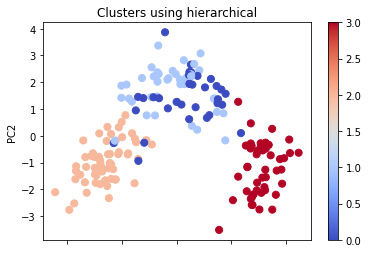

In [43]:
df_PCA1.plot(x="PC1",y ="PC2",c=h_complete.fit_predict(pca_val),kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using hierarchical') 

from kmean clusting we get 3 cluster and from hierarchy clusting we get 4 cluster but cluster is more clear in kmean.